# Travail pratique 05 – Régression linéaire

## 1 Régression linéaire simple

### 1.2 Création d' un notebook pour lire la base de données «Boston housing dataset »

In [1]:
#variables globales
fsize_title = 16
fsize_axes = 14
figsize = (14,8)
edge = "black"
color= "dodgerblue"

In [2]:
import pandas as pd
import numpy as np
from random import randrange
import random
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    X, y = load_boston(return_X_y=True)
    b = load_boston()

bdf = pd.DataFrame(b.data, columns=b.feature_names)
# Il faut renommmer la dernière colonne
bdf['MEDV'] = pd.Series(b.target)
# Affichage du dataframe

### 1.3 Se familiariser avec la base de données

p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes. Générez un
histogramme de la distribution de la variable indépendente.

In [3]:
#Afficher le contenu du dataframe généré
bdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
bdf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# Afficher la descritpion des données
print(b.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
dataNb = len(bdf.index)
print("Nombre de d'objets dans le dataset (lignes) : ", dataNb)
cols = list(bdf)

print("Nombre d'attributs (colonnes) dans le dataset: ", len(cols))
print("Logiquement nous devrions avoir", len(cols), " * ", dataNb, " éléments = ", len(cols) * dataNb)
print("Nombre actuel d'éléments: ", bdf.size)
print ("On peut en conclure qu'il n'y a as de données manquantes")

Nombre de d'objets dans le dataset (lignes) :  506
Nombre d'attributs (colonnes) dans le dataset:  14
Logiquement nous devrions avoir 14  *  506  éléments =  7084
Nombre actuel d'éléments:  7084
On peut en conclure qu'il n'y a as de données manquantes


#### 1.3.1 Analyse de la description

Selon la description, il y a 506 records pour 14 attributs et aucune données manquantes. Nous pouvons voir que c'est bien le cas. Notre dataFrame contient bien 14 colonnes, 506 lignes, et aucune colonne n'a de valeurs manquantes

Nous allons maintenant étudier la répartition des données avec un histogramme sur la variable MEDV (demandé dans la consigne) et des boxplots pour toutes les autres variables pour avoir un bel overview

#### 1.3.2 Répartition de la variable MEDV

Text(0, 0.5, 'Prix médian des maisons (x1000$)')

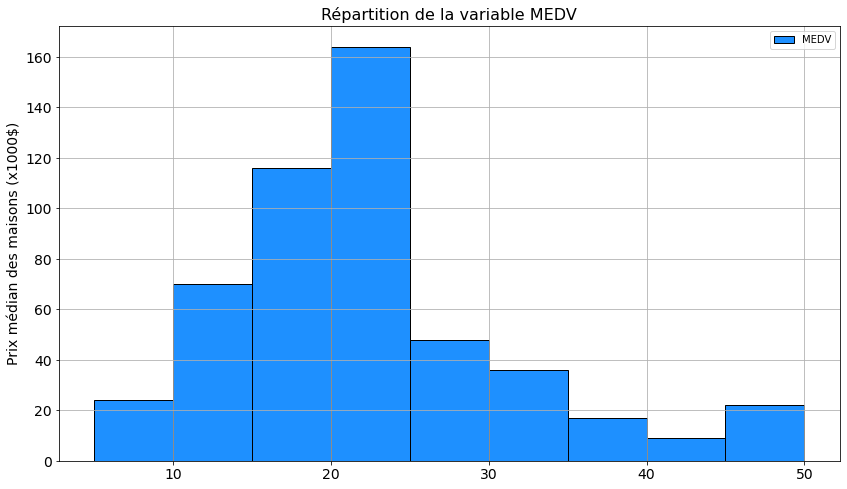

In [7]:
#afficher la répartition de la variable MEDV

#Nous avons utilisé 9 bins pour être "calqué" sur les axes
bdf["MEDV"].hist(bins = 9, figsize=figsize, xlabelsize=fsize_axes,
                 legend=True, ylabelsize=14, color=color, edgecolor=edge)
plt.title("Répartition de la variable MEDV", fontsize=fsize_title)
plt.ylabel("Prix médian des maisons (x1000$)", fontsize=fsize_axes)

### 1.4 Visualiser des boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE.

Text(0.5, 0.98, 'Boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE')

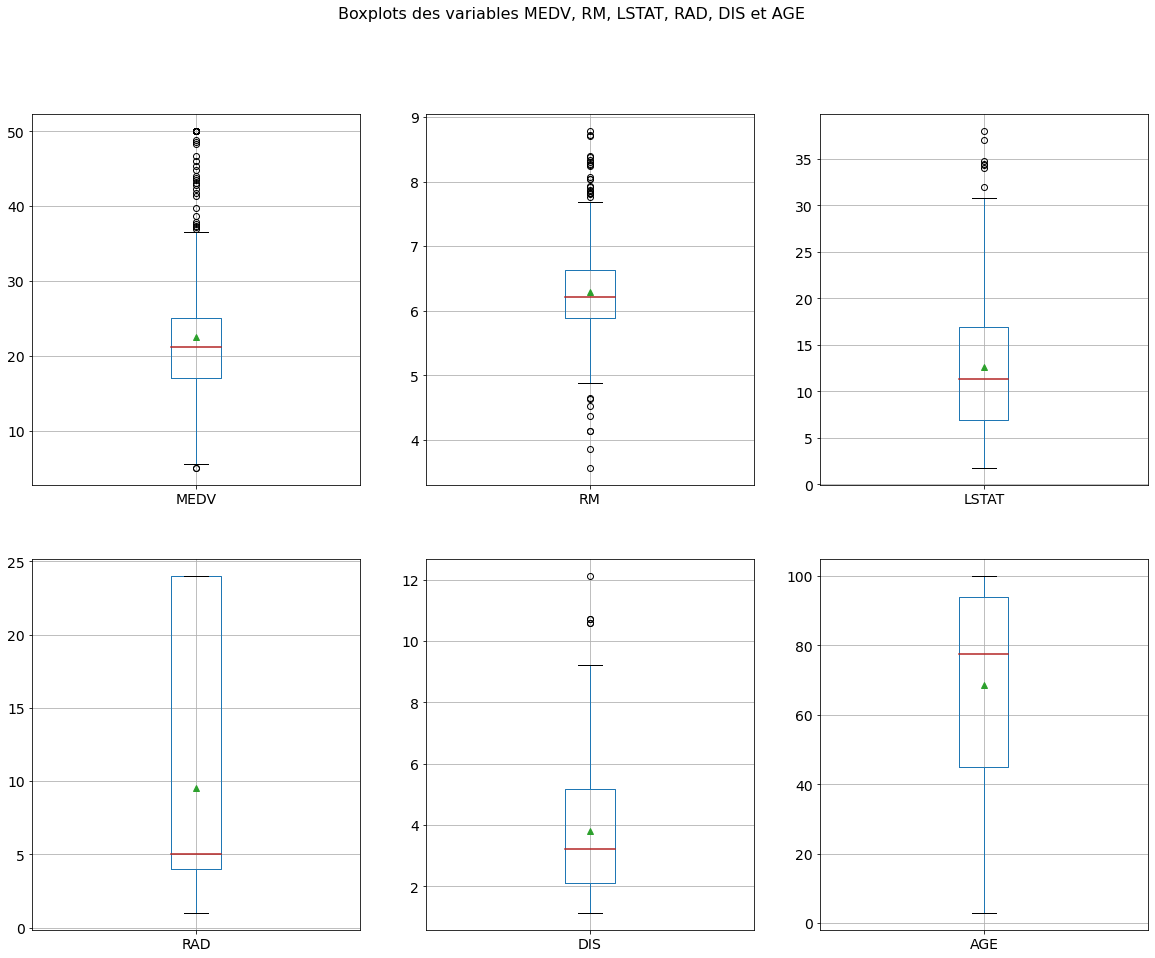

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
labels = ['MEDV', 'RM', 'LSTAT', 'RAD', 'DIS', 'AGE']

for i,lab in enumerate(labels):
    bdf.boxplot(lab, ax=axes[i // 3, i % 3], showmeans=True, fontsize=fsize_axes,
                medianprops = dict(linewidth=1.5, color='firebrick'))

fig.suptitle("Boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE", fontsize=fsize_title)

### 1.5 Créez des modèles en utilisant l’algorithme de régression linéaire simple

estimer la valeur MEDV à partir des variables RM, RAD et LSTAT, chaque fois utilisant seulement une des variables.
Programmez les fonctions pour faire une validation hold-out (e.g., 80% train + 20% test x 100 fois) et pour calculer le coefficient de détermination afin d’évaluer la performance moyenne du modèle. Commentez vos résultats.

In [9]:
def compute_MSE(b,m,data):
    totalError = 0   # Mean squared error formula
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
    return totalError / float(len(data)) # on divise par N

def step_gradient(b_current, m_current, data, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b, m = step_gradient(b, m, np.array(data), learning_rate)
        #print("After {0} epochs: b = {1}, m = {2}, error = {3}".format(i, b, m, compute_MSE(b, m, data)))
    return [b, m]

def normalize(df):
    return df.divide(df.max(axis=0))

In [10]:
def afficherGraphiques(df, lrate, n_epochs):
    #On initialise la valeur de m et de b
    initial_b = np.random.rand(1)  # intercept
    initial_m = np.random.rand(1)  # pente
    dataFrame = df.copy()
    for col in ['RM', 'RAD', 'LSTAT']:
        # Collecter les données
        data = dataFrame[[col, 'MEDV']].to_numpy()

        # On applique la méthode du gradient descendant
        print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_MSE(initial_b, initial_m, data)))
        print("Running...")
        [b, m] = gradient_descent(data, initial_b, initial_m, lrate, n_epochs)
        print("After {0} epochs: b = {1}, m = {2}, error = {3}".format(n_epochs, b, m, compute_MSE(b, m, data)))
        x = np.linspace(min(data[:, 0]), max(data[:, 0]))

        plt.figure(figsize=(8,6))
        plt.scatter(data[:, 0], data[:, 1])
        plt.plot(x, m*x + b, 'r')
        plt.title('Modèle de MEDV en fonction de ' + str(col))
        plt.xlabel(col)
        plt.ylabel('MDEV')
        plt.show()

Starting gradient descent at b = [0.15372128], m = [0.93094652], error = [349.68565781]
Running...
After 1000 epochs: b = [-1.48866486], m = [3.88573729], error = [57.16622619]


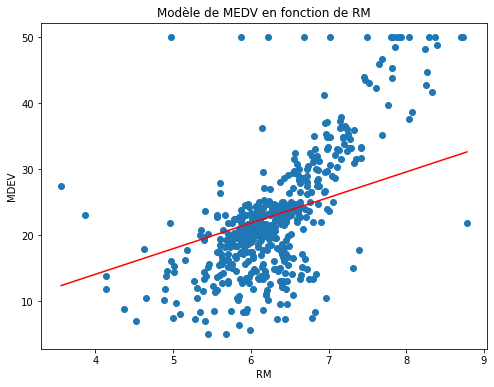

Starting gradient descent at b = [0.15372128], m = [0.93094652], error = [388.74186084]
Running...
After 1000 epochs: b = [23.65312176], m = [-0.24648782], error = [75.50211924]


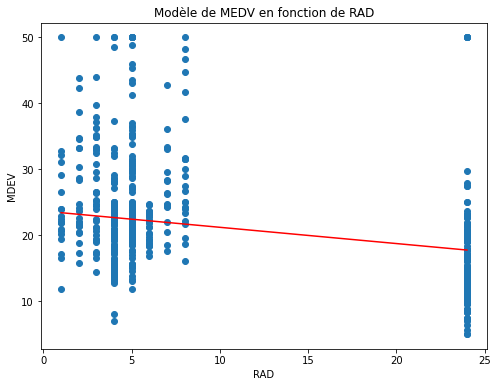

Starting gradient descent at b = [0.15372128], m = [0.93094652], error = [330.90817885]
Running...
After 1000 epochs: b = [24.22137797], m = [-0.32971699], error = [64.23466183]


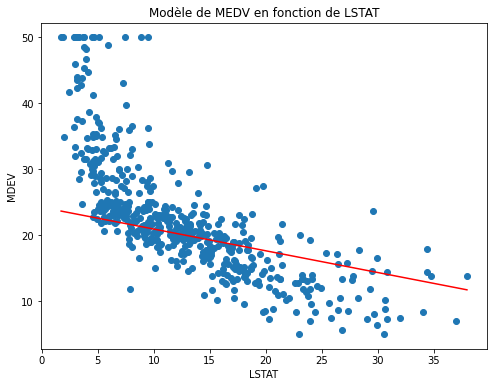

In [11]:
# On choisit les hyperparamètres ("par défaut", donnés en cours)
learning_rate = 0.005
# Nombre d'époques nécessaires
num_epochs = 1000

afficherGraphiques(bdf, learning_rate, num_epochs)

In [12]:
# Evaluation Hold-Out
# Split a dataset into a train and test set
def train_test_split(dataset,split=0.60):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

In [13]:
def calculerRCarre(dataset, testset, lrate, n_epochs):
    # On initialise la valeur de m et de b
    # Utilisation de `random.random()` car plus rapide que Numpy `random.rand()`
    initial_b = random.random() # intercept
    initial_m = random.random() # pente

    # On applique la méthode du gradient descendant
    [h, m] = gradient_descent(np.array(dataset), initial_b, initial_m, lrate, n_epochs)

    # Moyenne des mesures
    y_barre = np.mean(testset, axis=0)[1]

    # Calcul de R²
    # numérateur
    a = 0
    # dénominateur
    b = 0
    for row in testset:
        # valeur réelle
        yi = row[1]
        # prédiction
        y_chapeau_i = m*row[0] + h
        
        a += (yi - y_chapeau_i) ** 2
        b += (yi - y_barre) ** 2    
    
    # calcul de final de R²:
    return 1 - (a / b)

In [14]:
def calculerPerformance(df, N, col_data, col_predict, lrate, n_epochs):
    assert N > 0
    dataFrame = df.copy()
    scores = list()
    for _ in range(N):
        # Collecter les données
        dataset, testset = train_test_split(dataFrame[[col_data, col_predict]].values.tolist(), 0.80)
        scores.append(calculerRCarre(dataset, testset, lrate, n_epochs))

    moyenne = np.mean(scores)
    meilleur = np.max(scores)
    pire = np.min(scores)
    return [moyenne, meilleur, pire]

In [15]:
# Selon la donnée, la précision de la moyenne doit être à 100.
# Malheureusement, cela prend beaucoup de temps pour s'exécuter.

# Précision (Si vous êtes pressés, baissez cette valeur)
N = 100
learning_rate = 0.0001
num_epochs = 50

for col in ['RM', 'RAD', 'LSTAT']:
    [moyenne, meilleur, pire] = calculerPerformance(bdf, N, col, 'MEDV', learning_rate, num_epochs)
    print("Moyenne de R² pour déterminer MEDV en fonction de", col, ":", moyenne)

Moyenne de R² pour déterminer MEDV en fonction de RM : -2.650907763079672
Moyenne de R² pour déterminer MEDV en fonction de RAD : -3.844635182386089
Moyenne de R² pour déterminer MEDV en fonction de LSTAT : -2.932805667576148


### 1.6 Explorez les hyper-paramètres : learning_rate et nombre d’epochs

Calculez la performance moyenne (c.a.d., la moyenne de x100 fois le coefficient de détermination calculé sur le test set) du meilleur modèle trouvé par validation hold-out. Indiquez la valeur des hyper-paramètres qui donnent les meilleurs résultats et la meilleure performance trouvée. Générez un scatter-plot affichant les données (variable indépendante, variable dépendante) et la ligne droite trouvée par régression linéaire. (Note : la variable dépendante
est MEDV).

In [ ]:
# Exploration des hyper-paramètres

# Précision (Si vous êtes pressés, baissez cette valeur)
N = 100

# Meilleurs hyper-paramètres trouvés "à la main":
learning_rate = 0.0075
# Nombre obligatoirement grand car sinon il faut augmenter le learning_rate et
# cela produirait malheureusement des overflows
num_epochs = 1250

# Meilleur modèle trouvé par validation hold-out
for col in ['RM', 'RAD', 'LSTAT']:
    # Selon le nombre d'époques et la précision, le calcul peut prendre BEAUCOUP de temps
    [moyenne, meilleur, pire] = calculerPerformance(bdf, N, col, 'MEDV', learning_rate, num_epochs)
    
    print("Moyenne de R² pour déterminer MEDV en fonction de", col, ":", moyenne)
    print("Meilleur R² pour déterminer MEDV en fonction de", col, ":", meilleur)
    print("Pire R² pour déterminer MEDV en fonction de", col, ":", pire)
    print("")